In [1]:
import numpy as np
from pyuvdata import UVData
import hydra_pspec as hp

In [2]:
data = np.load('paper_plots/sim_data/gain_true.npy')

In [3]:
uvd = UVData()
vis_path='/nvme2/scratch/sohini/hydra-pspec-systematic/hera_val/vis_corrupted_test.uvh5' #Sohini's laptop
uvd.read(vis_path)
uvd = hp.utils.form_pseudo_stokes_vis(uvd)
vis = uvd.get_data((0, 1, "xx"))

uvd = UVData()
vis_fg_path='/nvme2/scratch/sohini/hydra-pspec-systematic/test_data/vis-ptsrc-gsm.uvh5' #Sohini's laptop
uvd.read(vis_fg_path)
uvd = hp.utils.form_pseudo_stokes_vis(uvd)
fg_true = uvd.get_data((0, 1, "xx"))  # shape

uvd = UVData()
vis_eor_path='/nvme2/scratch/sohini/hydra-pspec-systematic/test_data/vis-eor.uvh5'
uvd.read(vis_eor_path)
uvd.conjugate_bls()
uvd = hp.utils.form_pseudo_stokes_vis(uvd)
eor_true = uvd.get_data((0, 1, "xx"))  # shape (Ntimes, Nfreqs)
freqs=uvd.freq_array
lsts=uvd.lst_array

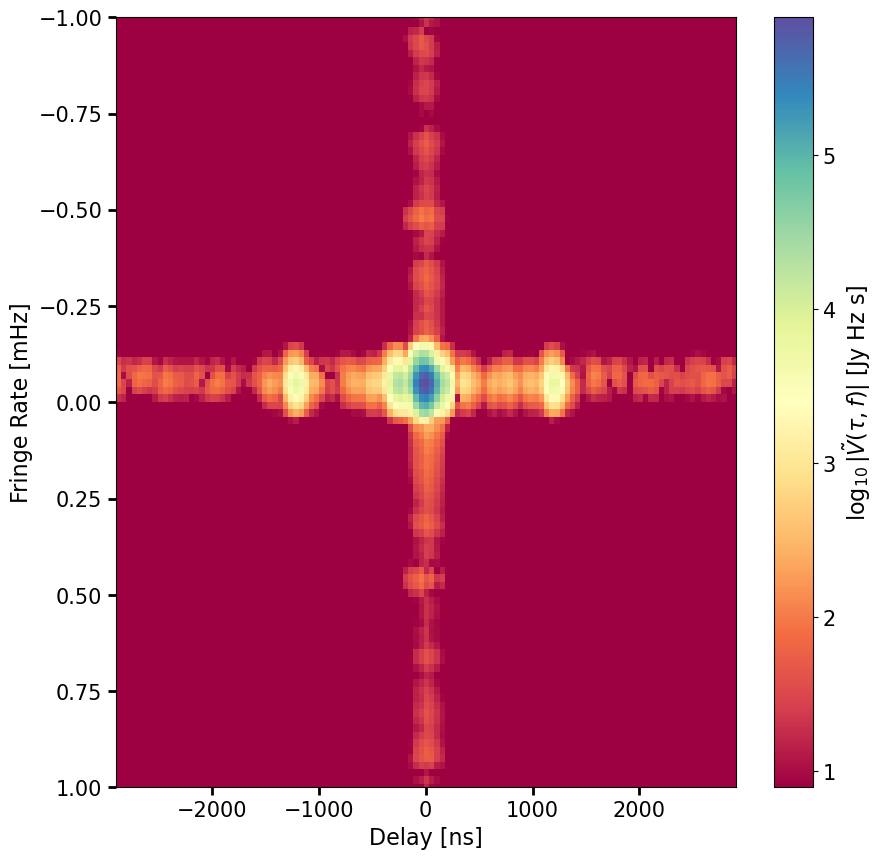

In [4]:
import matplotlib.pyplot as plt 
from plotting_functions import plot_waterfalls, plot_waterfalls_from_dlfr

corr_dlfr=plot_waterfalls(vis, freqs, lsts, windows='blackman-harris', mode='log', 
                    cmap='Spectral', dynamic_range=5, limit_drng='all',
                    baseline=None, horizon_color='magenta', plot_limits={"delay" : (-2900, 2900), "fringe_rate" : (1, -1)},
                    freq_window_kwargs=None, time_window_kwargs=None)

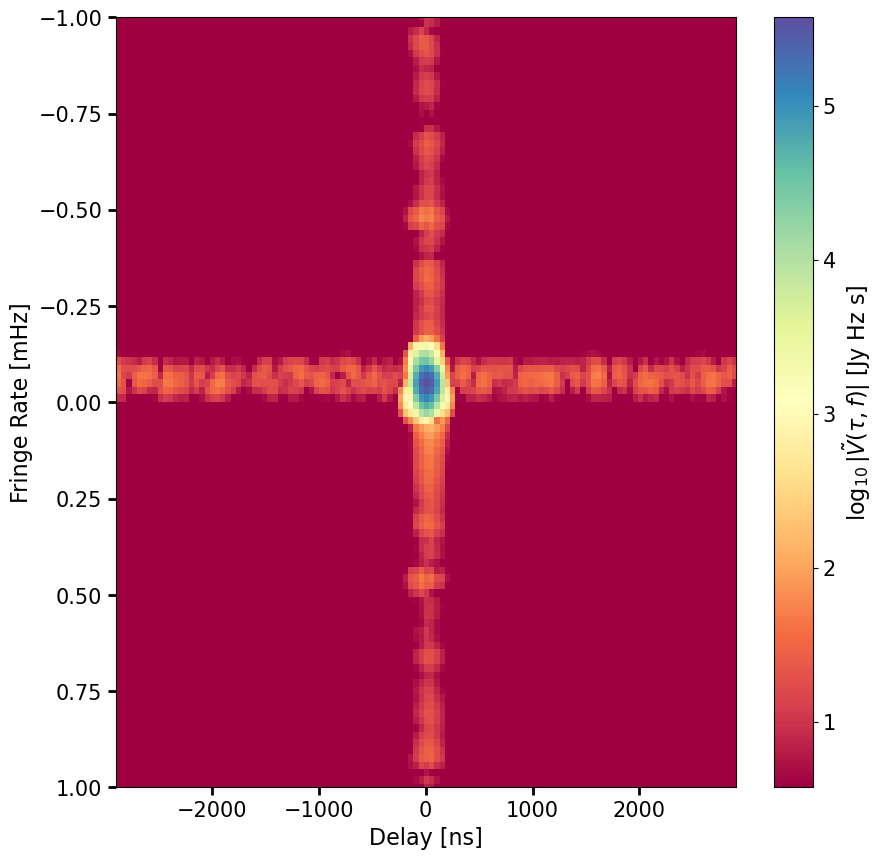

In [5]:
sky_dlfr=plot_waterfalls((fg_true+eor_true), freqs, lsts, windows='blackman-harris', mode='log', 
                    cmap='Spectral', dynamic_range=5, limit_drng='all',
                    baseline=None, horizon_color='magenta', plot_limits={"delay" : (-2900, 2900), "fringe_rate" : (1, -1)},
                    freq_window_kwargs=None, time_window_kwargs=None)

In [6]:
corr_dlfr[1] - sky_dlfr[1]

array([[ 2.96242542e-04+1.96920194e-05j, -3.05081430e-04+1.80311304e-04j,
         3.53727646e-04-3.98166781e-04j, ...,
        -6.62945920e-05-2.11105255e-04j,  2.71166443e-04+9.55138531e-05j,
        -1.20358465e-04+2.11696447e-05j],
       [-1.39365086e-04+5.92838562e-05j,  2.17454117e-04-1.01959514e-04j,
        -3.55803119e-04+1.67807285e-04j, ...,
         2.50476842e-04+4.28282311e-04j, -5.14735854e-04-5.49912117e-05j,
         1.67641958e-04-1.65467667e-04j],
       [-3.96800165e-06-8.45454707e-05j, -8.43790319e-05-2.07267314e-05j,
         3.48841116e-04-5.45816056e-05j, ...,
        -4.16845388e-04-3.63331170e-04j,  6.17164422e-04-1.56497244e-04j,
        -7.16339455e-05+3.47143576e-04j],
       ...,
       [-1.47281434e-06+2.87594999e-05j, -8.11274928e-06-1.46612352e-05j,
        -1.43694029e-04-4.48141449e-05j, ...,
         1.52890832e-04-1.13560929e-04j, -1.56524151e-04+9.65730531e-05j,
         1.28112849e-05-1.58497778e-04j],
       [ 1.17618496e-04+8.90479585e-05j, -1.

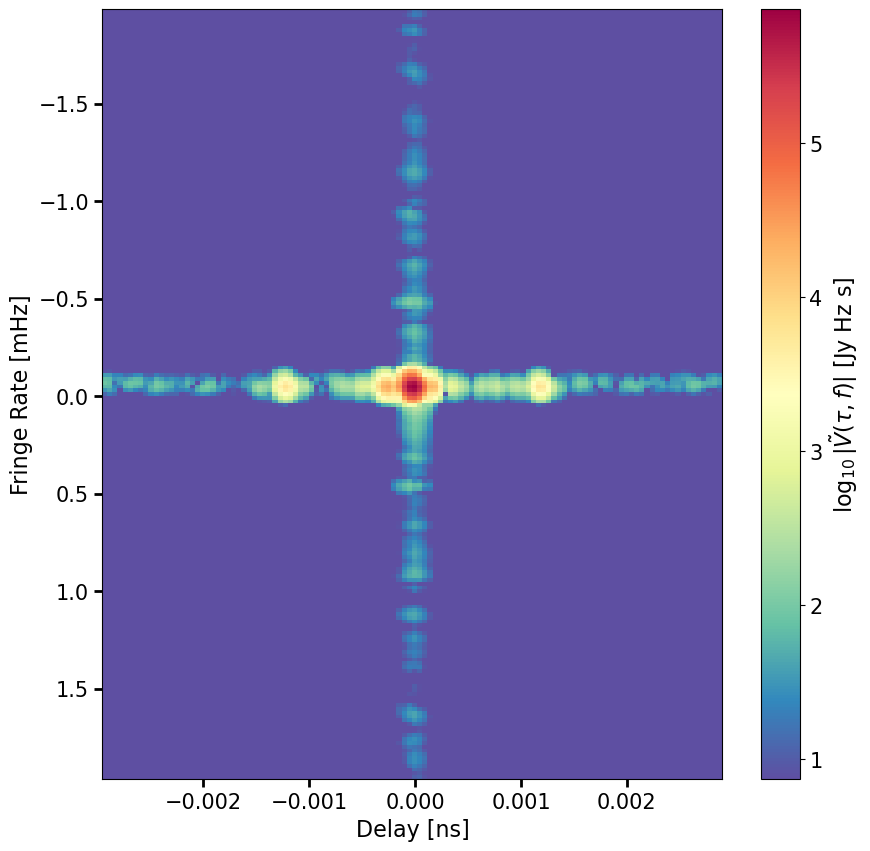

In [7]:
plot_waterfalls_from_dlfr(corr_dlfr[1] - sky_dlfr[1], freqs*1e6, lsts, fig=None,ax=None, mode='log', 
            vmin=None,vmax=None,cmap='Spectral_r', dynamic_range=5, limit_drng='all', colorbar_flag=True,
            baseline=None, horizon_color='magenta')

In [8]:
dl_inds=[[3,4,5,6],[10,11,12,13],[3,3,3,3]]

In [9]:
dl_inds[1]

[10, 11, 12, 13]

In [10]:
eor = np.load('paper_plots/filtered_data/gcr-eor.npy')

In [11]:
b_sys.shape

NameError: name 'b_sys' is not defined

Text(0.5, 0, 'Iterations')

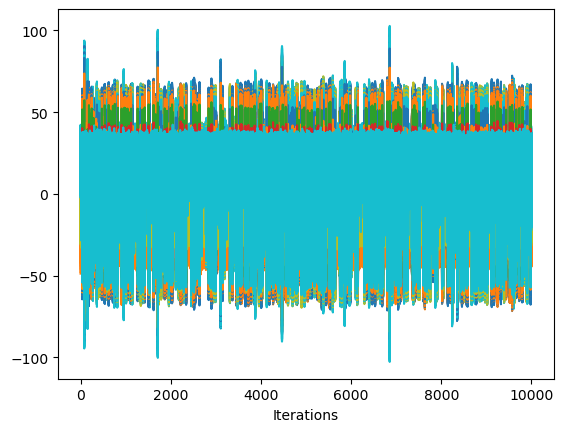

In [ ]:
for i in range(4):
    plt.plot(eor[:,i].real)
plt.xlabel('Iterations')

In [14]:
gcr_dynamic = np.loadtxt('paper_plots/true_sky/gcr-eor_dynamic.npy',dtype='complex')

In [15]:
gcr_eor=np.load('paper_plots/true_sky/gcr-eor.npy')

In [16]:
gcr_dynamic.shape,type(gcr_dynamic[0]),gcr_eor.shape,type(gcr_eor[0])

((7840, 60), numpy.ndarray, (10, 80, 60), numpy.ndarray)

In [31]:
import h5py, numpy as np
with h5py.File("paper_plots/true_sky/gibbs_samples.h5", "r") as f:
    signal_amps = f["signal_amps"][:]   # (nsaved, n_times, n_freqs), complex
    signal_ps   = f["signal_ps"][:]     # (nsaved, n_freqs)
    fg_amps     = f["fg_amps"][:]       # (nsaved, Nmodes)
    sys_amps    = f["sys_amps"][:]      # (nsaved, Nb)
    chisq       = f["chisq"][:]         # (nsaved, ...) as created
    ln_post     = f["ln_post"][:]       # (nsaved,)

In [32]:
signal_amps.shape

(36, 80, 60)